In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from pandas import datetime
import datetime as dt


<ipython-input-1-ef9c785ab048>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')

In [3]:
do=pd.read_csv("USC.csv")
do.head()


,Period,Total
0,Jan-00,49045412
1,Feb-00,49306303
2,Mar-00,60443541
3,Apr-00,58286680
4,May-00,60533783


In [4]:
dt = pd.read_csv("USC.csv",
                parse_dates=['Period'], index_col='Period',
                 date_parser=dateparse)
dt.head()
                 

<ipython-input-2-5529f2efd1cf>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')


,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [5]:
dt.isnull().sum()

Total    0
dtype: int64

In [7]:
dt.dtypes

Total    int64
dtype: object

In [8]:
dt1=dt['Total']
dt1.head

<bound method NDFrame.head of Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
                ...   
2019-10-01    88208131
2019-11-01    81010193
2019-12-01    90389583
2020-01-01    81537476
2020-02-01    74428909
Name: Total, Length: 242, dtype: int64>

In [10]:
dt1.shape

(242,)

<AxesSubplot:xlabel='Period'>

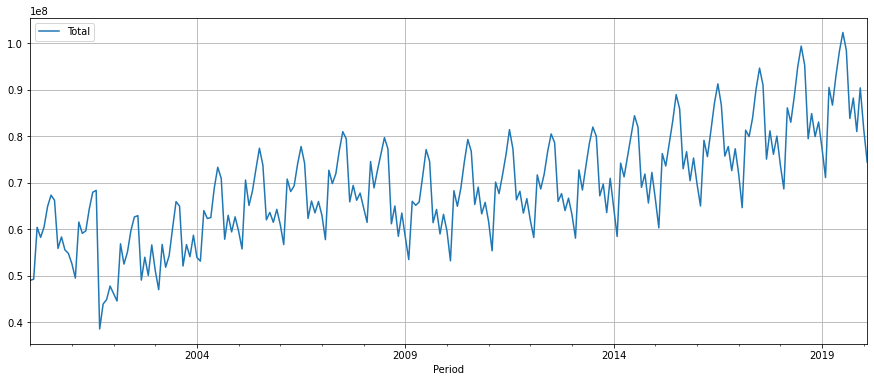

In [11]:
dt.plot(grid = True)   ##shows upward trend

<AxesSubplot:xlabel='Period'>

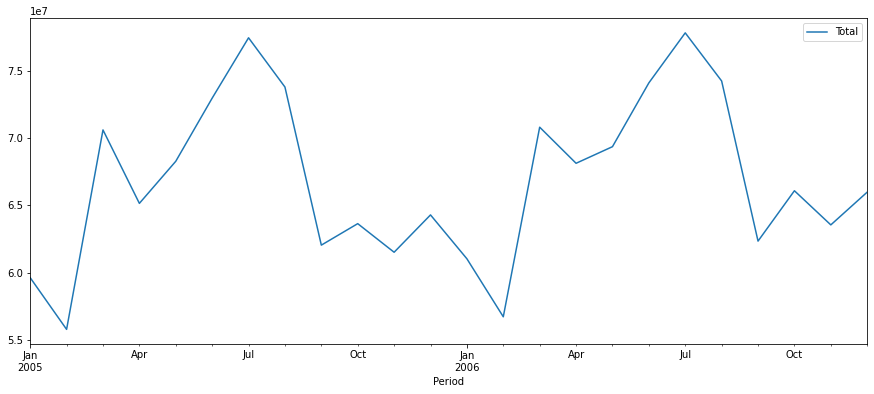

In [14]:
from datetime import datetime
start = datetime(2005,1,1)
end = datetime(2006,12,1)
dt[(start<=dt.index)  &  (dt.index<=end)].plot()

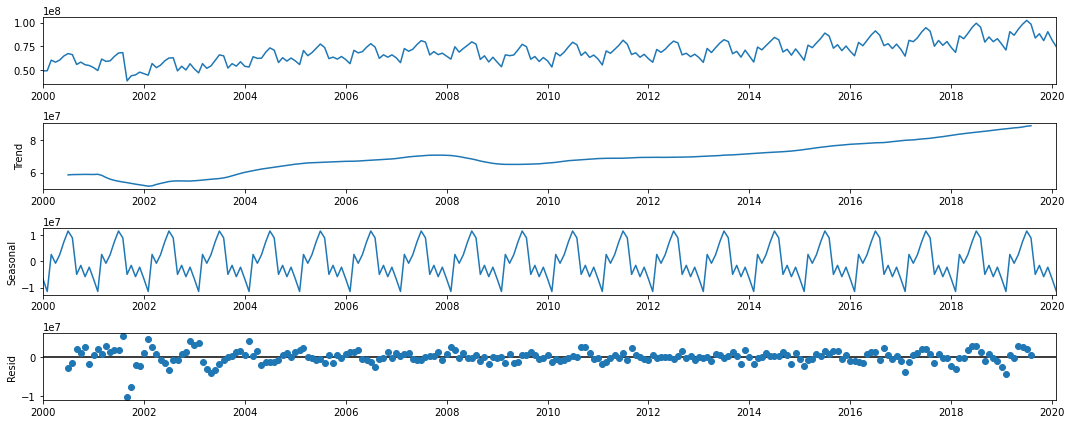

In [15]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(dt, model = 'Additive')
fig = decomposition.plot()

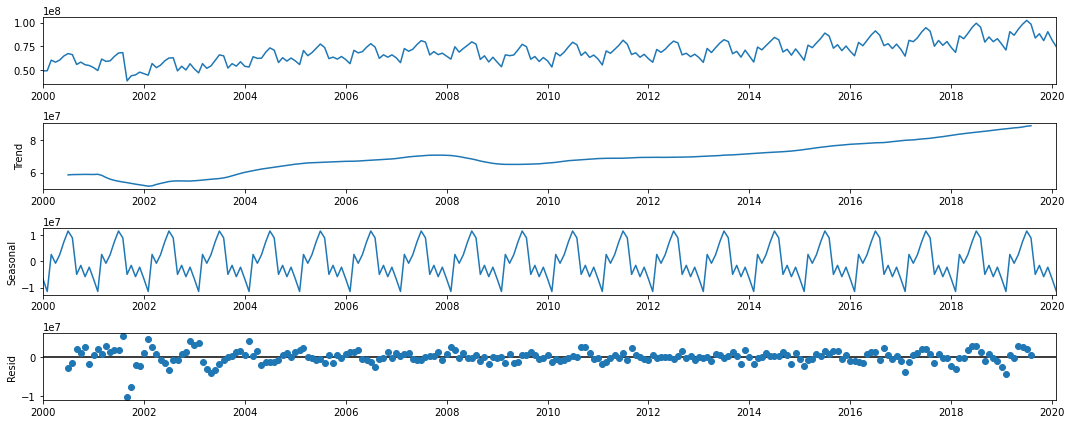

In [16]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(dt, model = 'Multiplicative')
fig = decomposition.plot()

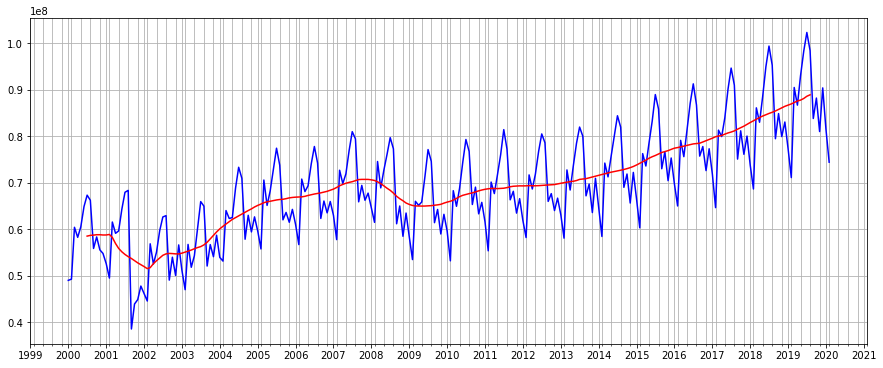

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(dt.index, dt['Total'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [25]:
dt.shape

(242, 1)

In [26]:
train=dt1[0:192]   #16 years data 
test=dt1[192:]    #5 years 

In [27]:
train.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [28]:
test.tail()

Period
2019-10-01    88208131
2019-11-01    81010193
2019-12-01    90389583
2020-01-01    81537476
2020-02-01    74428909
Name: Total, dtype: int64

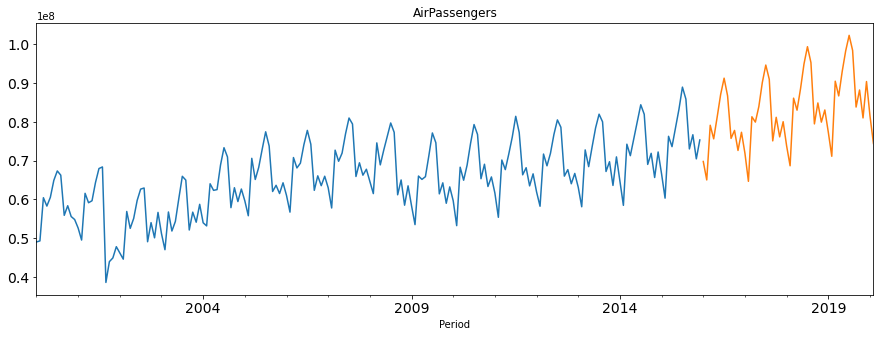

In [29]:
train.plot(figsize=(15,5), title= 'AirPassengers', fontsize = 14)
test.plot(figsize=(15,5), title= 'AirPassengers', fontsize = 14)
plt.show()

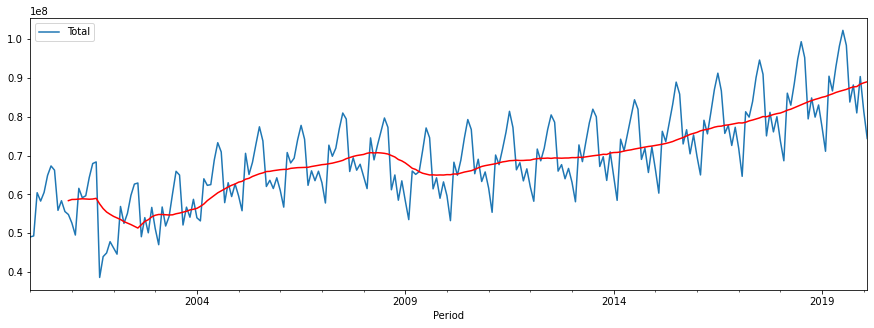

In [30]:
moving_avg =dt1.rolling(12).mean()
dt.plot(kind="line", figsize=(15,5))
moving_avg.plot(kind='line',figsize=(15,5),color='red')
plt.show()

<ipython-input-33-99c2453b4d4f>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(dt1,model='multiplicative', freq=12)


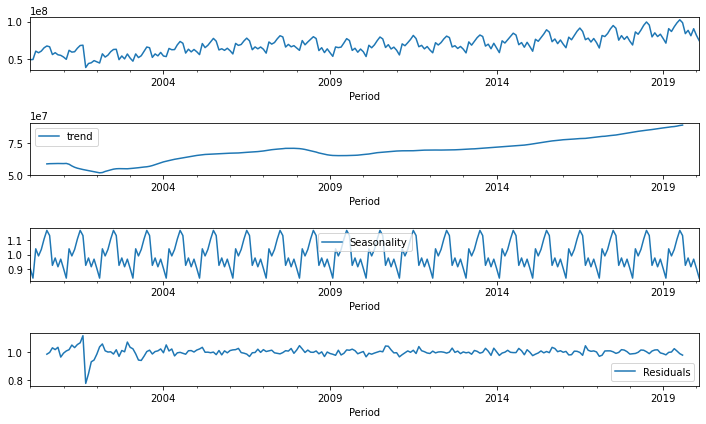

In [33]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(dt1,model='multiplicative', freq=12)
##fig = decomposition.plot()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
dt1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

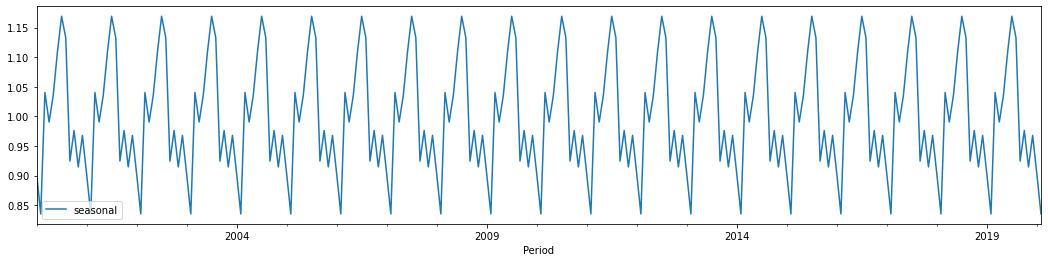

In [34]:
seasonal.plot(kind="line",figsize=(18,4))
plt.legend(loc='best')

<ipython-input-35-6e2124fb8e28>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sts.seasonal_decompose(dt1,model='additive', freq=12)


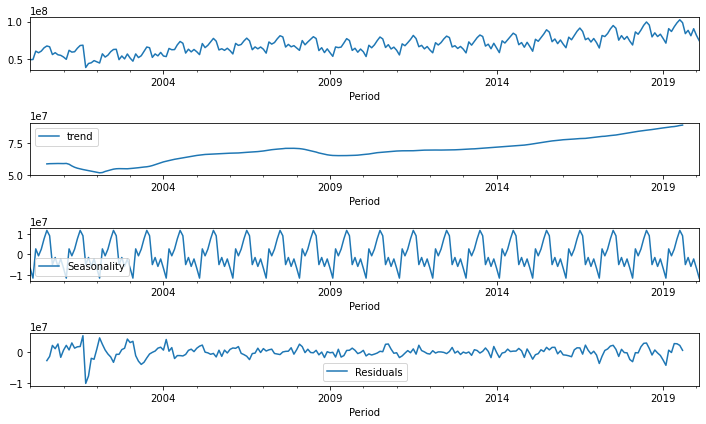

In [35]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(dt1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
dt1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
#simplesmoothing is used when. data doesn't follow trend or seasonality. there is seasonality in dataset
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,Total,No. Observations:,192
Model:,SimpleExpSmoothing,SSE,8167583724499310.000
Optimized:,True,AIC,6029.239
Trend:,None,BIC,6035.754
Seasonal:,None,AICC,6029.453
Seasonal Periods:,None,Date:,"Tue, 07 Dec 2021"
Box-Cox:,False,Time:,12:21:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7086484,alpha,True
initial_level,4.9045e+07,l.0,True


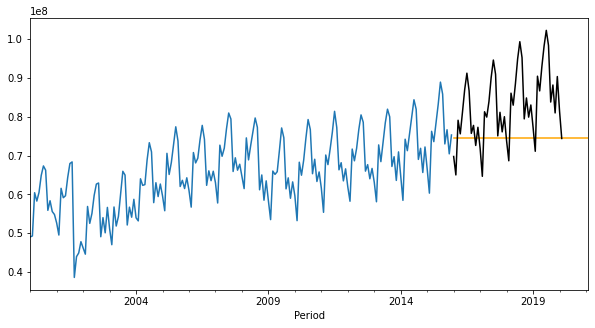

In [44]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [46]:
hes = ExponentialSmoothing(train, trend='add').fit()
hes.summary()

/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,192
Model:,ExponentialSmoothing,SSE,8168136529071582.000
Optimized:,True,AIC,6033.252
Trend:,Additive,BIC,6046.282
Seasonal:,None,AICC,6033.706
Seasonal Periods:,None,Date:,"Tue, 07 Dec 2021"
Box-Cox:,False,Time:,12:21:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7121429,alpha,True
smoothing_trend,0.0001,beta,True


In [47]:
hes1 = hes.forecast(62)

<AxesSubplot:xlabel='Period'>

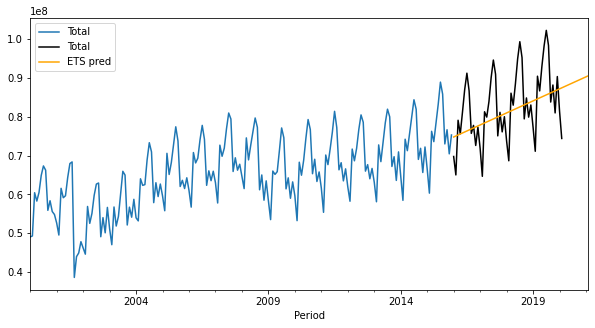

In [48]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [49]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="Multiplicative").fit()
hwes.summary()

/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Total,No. Observations:,192
Model:,ExponentialSmoothing,SSE,815468265070360.750
Optimized:,True,AIC,5614.839
Trend:,Additive,BIC,5666.959
Seasonal:,Multiplicative,AICC,5618.793
Seasonal Periods:,12,Date:,"Tue, 07 Dec 2021"
Box-Cox:,False,Time:,12:23:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5353571,alpha,True
smoothing_trend,0.0254932,beta,True


In [51]:
hwes1 = hwes.forecast(62)
#print(hwes1)

<AxesSubplot:xlabel='Period'>

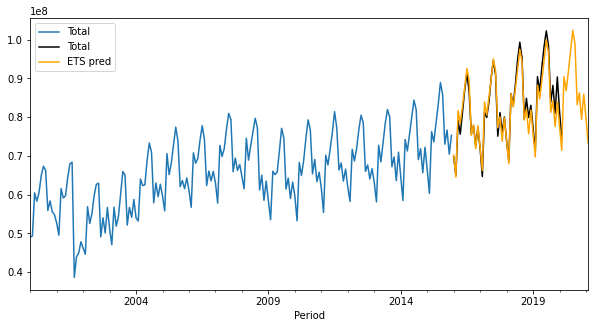

In [52]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

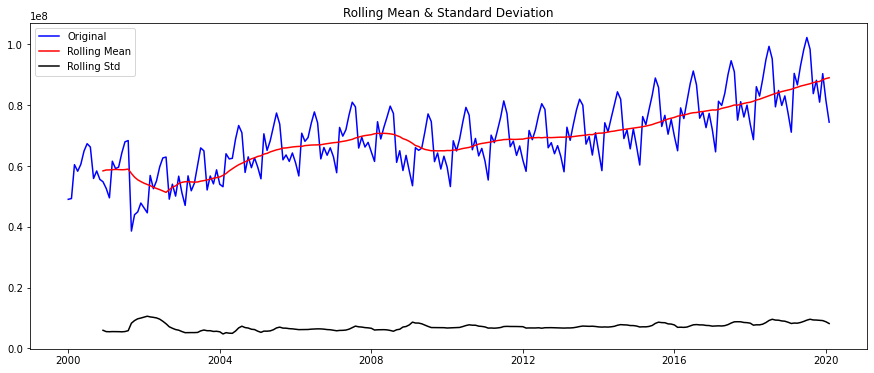

Results of Dickey-Fuller Test:
Test Statistic                   0.226120
p-value                          0.973689
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [55]:
test_stationarity(dt)

In [56]:
diff1=train.diff()
diff1=diff1.dropna()

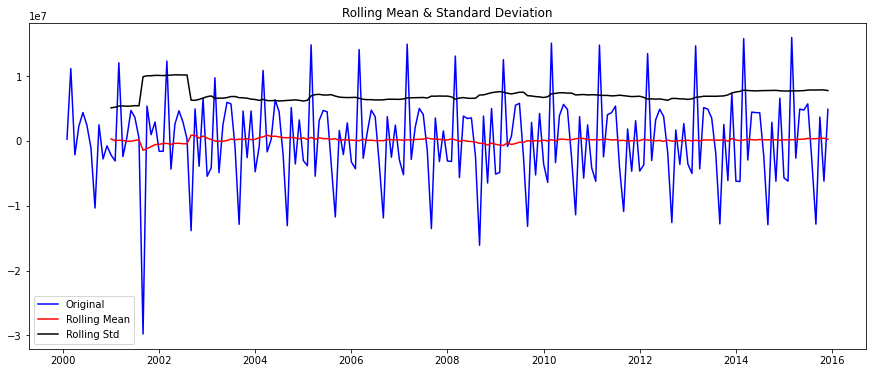

Results of Dickey-Fuller Test:
Test Statistic                  -3.502967
p-value                          0.007911
#Lags Used                      12.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [57]:
test_stationarity(diff1)

In [58]:
diff2=diff1.diff()
diff2=diff2.dropna()

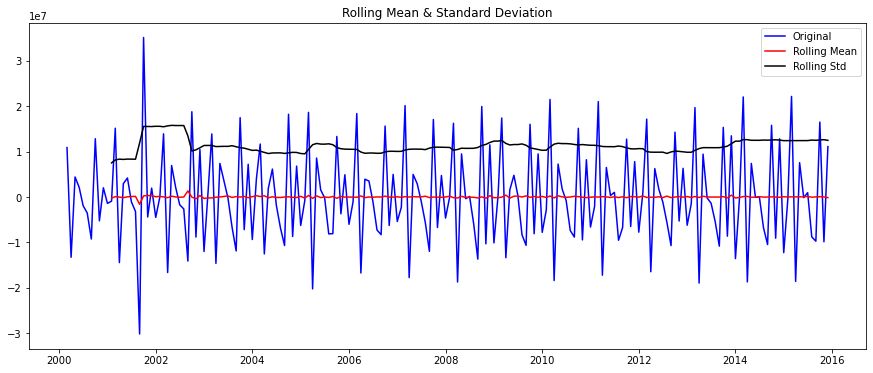

Results of Dickey-Fuller Test:
Test Statistic                -7.216361e+00
p-value                        2.167962e-10
#Lags Used                     1.500000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64


In [59]:
test_stationarity(diff2)

In [60]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


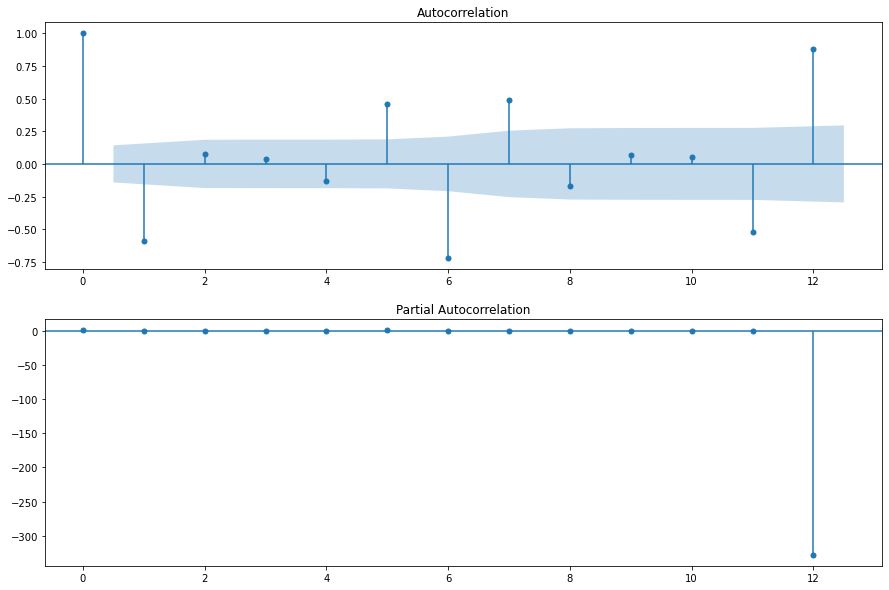

In [61]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=5682.931, Time=0.31 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=5590.190, Time=0.15 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=5472.208, Time=0.16 sec
 ARIMA(0,2,1)(0,2,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(1,2,1)[12]             : AIC=5473.210, Time=0.29 sec
 ARIMA(0,2,1)(0,2,2)[12]             : AIC=5473.094, Time=0.67 sec
 ARIMA(0,2,1)(1,2,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,2,1)(1,2,2)[12]             : AIC=5474.021, Time=1.40 sec
 ARIMA(0,2,0)(0,2,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,1)(0,2,1)[12]             : AIC=5469.414, Time=0.20 sec
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,1)(1,2,1)[12]             : AIC=5470.451, Time=0.28 sec
 ARIMA(1,2,1)(0,2,2)[12]             : AIC=5470.334, Time=0.61 sec
 ARIMA(1,2,1)(1,2,0)[12]             : AIC=5508.778, Time=0.28 sec
 ARIMA(1,2,1)(1,2,2)[12]             : 

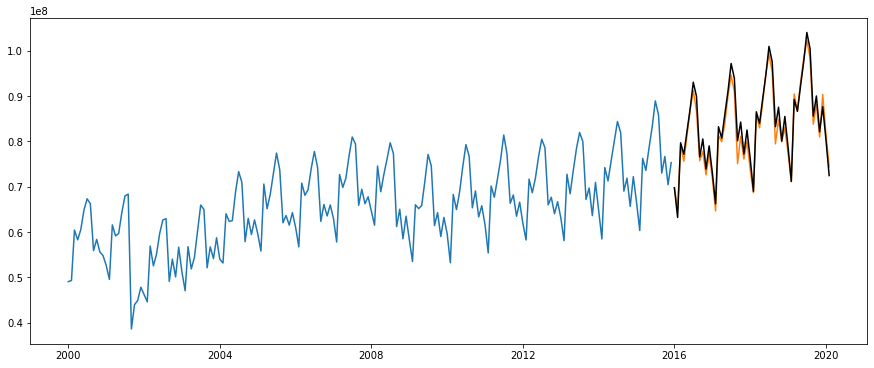

In [62]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [63]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(2, 2, 2)x(0, 2, [1], 12)   Log Likelihood               -2707.199
Date:                              Tue, 07 Dec 2021   AIC                           5426.397
Time:                                      12:35:13   BIC                           5445.069
Sample:                                           0   HQIC                          5433.976
                                              - 192                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2199      0.147     -8.293      0.000      -1.508      -0.932
ar.L2         -0.27

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [71]:
model = ARIMA(train, order=(0,1,1))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  191
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3268.404
Method:                       css-mle   S.D. of innovations        6536365.854
Date:                Tue, 07 Dec 2021   AIC                           6542.808
Time:                        17:35:15   BIC                           6552.565
Sample:                    02-01-2000   HQIC                          6546.760
                         - 12-01-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.376e+05   3.36e+05      0.410      0.682   -5.21e+05    7.96e+05
ma.L1.D.Total    -0.2914      0.075     -3.870      0.000      -0.439      -0.144
                                    Root

/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/chaitanyabhardwaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency infor

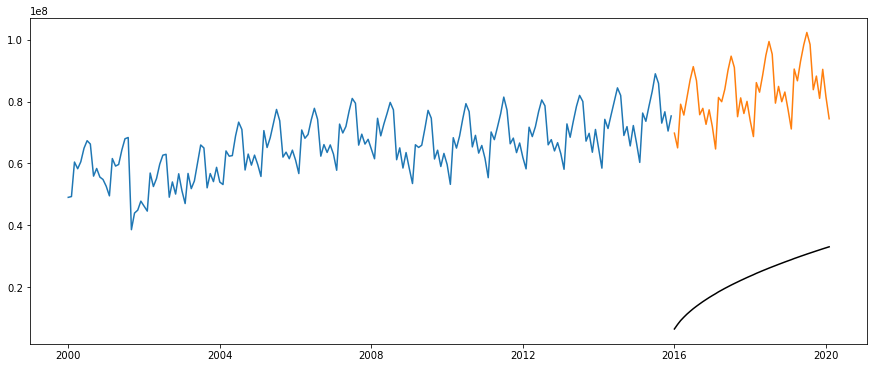